In [33]:
import pandas as pd

data = { 
    'credit_card_number': ['1111 2222 3333 4444', '1111 2222 3333 4444','1111 2222 3333 4444',
                           '1111 2222 3333 4444'],
    'trans_datetime': ['2022-01-01 08:44', '2022-01-01 19:44', '2022-01-01 20:44', '2022-01-01 20:55'],
    'amount': [142.34, 12.34, 66.29, 112.33],
    'location': ['Sao Paolo', 'Rio De Janeiro', 'Stockholm', 'Stockholm'],
    'fraud': [False, False, True, True] 
}

df = pd.DataFrame.from_dict(data)
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df

In [30]:
df

,credit_card_number,datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44,66.29,Stockholm,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_card_number  3 non-null      object 
 1   trans_datetime      3 non-null      object 
 2   amount              3 non-null      float64
 3   location            3 non-null      object 
 4   fraud               3 non-null      bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 227.0+ bytes


In [35]:
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   credit_card_number  3 non-null      object        
 1   trans_datetime      3 non-null      datetime64[ns]
 2   amount              3 non-null      float64       
 3   location            3 non-null      object        
 4   fraud               3 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 227.0+ bytes


In [21]:
import numpy as np
import timeit 

df2 = pd.DataFrame({
    'a':np.random.randint(1,100, size=10000),
    'b':np.random.randint(100,1000, size=10000),
    'c':np.random.random(10000)
})
df2.shape
(100000, 3)

(100000, 3)

### Vectorized operations are faster than "apply" with UDFs

We will see that apply is approximately 50 times slower than the equivalent vectorized operation on 100k rows.



In [22]:
%%timeit
df2['a'].apply(lambda x: x**2)

3.42 ms ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This vectorized operation is much faster

In [23]:
%%timeit
df2['a'] ** 2

59 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
df2.describe()

,a,b,c
count,10000.000000,10000.000000,10000.000000
mean,49.842200,550.282500,0.498931
std,28.469204,261.010388,0.289934
min,1.000000,100.000000,0.000039
25%,25.000000,322.000000,0.246945
50%,50.000000,551.000000,0.503111
75%,74.000000,777.000000,0.747757
max,99.000000,999.000000,0.999998


In [38]:
df.trans_datetime.unique()

array(['2022-01-01T08:44:00.000000000', '2022-01-01T19:44:00.000000000',
       '2022-01-01T20:44:00.000000000'], dtype='datetime64[ns]')

In [46]:
df.credit_card_number.nunique()

1

In [41]:
df.isnull().sum()

credit_card_number    0
trans_datetime        0
amount                0
location              0
fraud                 0
dtype: int64

## Transformations

Plot a histogram with a long tail.
Use numpy to seed the random number generator and generate a univariate data sample.


<AxesSubplot:ylabel='Count'>

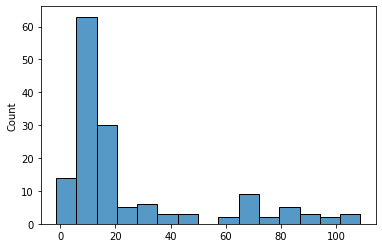

In [53]:
import seaborn as sns

from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
seed(1)
array = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
array = append(array, tail)
sns.histplot(array)

In [56]:
columns = ['amount']
                 
df_exp = pd.DataFrame(data = array, columns = columns)
  
df_exp.describe()

,amount
count,150.000000
mean,25.194928
std,27.371117
min,-1.507693
25%,8.683707
50%,12.923596
75%,28.576996
max,108.861615


## Standard Scalar in Vectorized Pandas

This is an efficient way to transform our input Pandas column into a range of [0.0, 1.]

In [57]:
# Min-Max Normalization
df_norm = (df_exp-df_exp.min())/(df_exp.max()-df_exp.min())
df_norm.head()

,amount
0,0.177852
1,0.076551
2,0.080338
3,0.055657
4,0.143470


<AxesSubplot:ylabel='Count'>

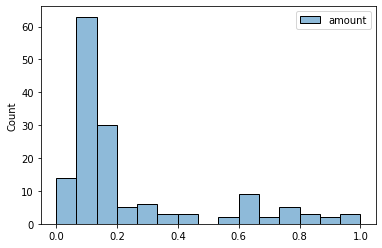

In [58]:
sns.histplot(df_norm)

## Power Transformer in Scikit-Learn

Scikit-Learn has many different transformation libraries.
For heavy-tailed distributions, it is often recommended to perform a [power transformation](
https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94)

We can see in the histogram, this produces a more Gaussian (normal) distribution than the MinMax Scalar.

<AxesSubplot:ylabel='Count'>

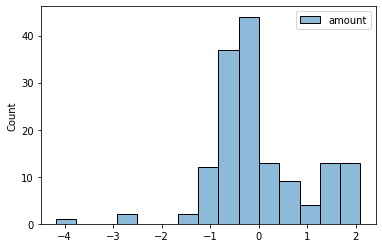

In [60]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df_power = pd.DataFrame(
    pt.fit_transform(df_exp[["amount"]]), columns=["amount"]
)

sns.histplot(df_power)